By the end of this you will be able to:
1. Create a dataset from a directory
2. Preprocess and augment data using the Sequential API
3. Adapt a pretained model to new data and train a classifier using the Functional API and MobileNet
4. Fine-tune a classifier's final layers to improve accuracy

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import tensorflow.keras.layers as tfl

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation

In [2]:
BATCH_SIZE = 32
IMG_SIZE = (160,160)
directory="dataset/"
train_dataset=tf.keras.preprocessing.image_dataset_from_directory(directory=directory,shuffle=True,image_size=IMG_SIZE,validation_split=0.2,subset='training',seed=42,batch_size=BATCH_SIZE)
validation_dataset=tf.keras.preprocessing.image_dataset_from_directory(directory=directory,shuffle=True,image_size=IMG_SIZE,validation_split=0.2,subset='validation',seed=42,batch_size=BATCH_SIZE)

Found 327 files belonging to 2 classes.
Using 262 files for training.
Found 327 files belonging to 2 classes.
Using 65 files for validation.


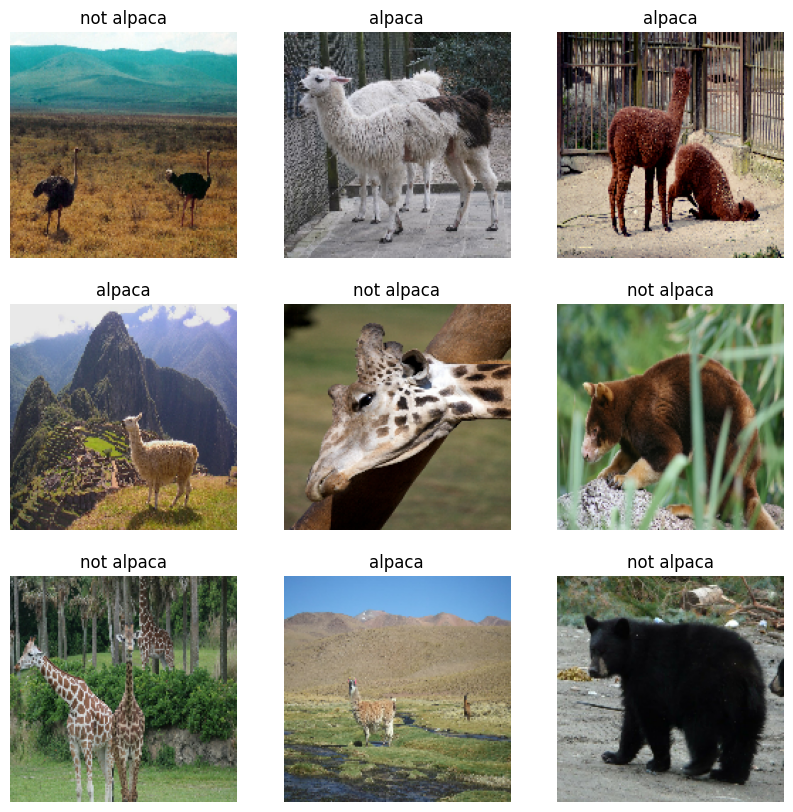

In [27]:

class_names=train_dataset.class_names
plt.figure(figsize=(10,10))
for (images,labels) in train_dataset.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [28]:
AUTOTUNE=tf.data.experimental.AUTOTUNE
train_dataset=train_dataset.prefetch(buffer_size=AUTOTUNE)

Implement a Keras function for data augmentation

In [29]:
def data_augmenter():
    data_augmentation=tf.keras.Sequential()
    data_augmentation.add(RandomFlip("horizontal"))
    data_augmentation.add(RandomRotation(0.2))

    return data_augmentation

In [30]:
data_augmentation=data_augmenter()



In [31]:
preprocess_input=tf.keras.applications.mobilenet_v2.preprocess_input

In [70]:
IMG_SHAPE=IMG_SIZE+(3,)
base_model_1=tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,include_top=True,weights='imagenet')

In [71]:
base_model_1.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_4[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

In [42]:
print(IMG_SIZE)

(160, 160)


In [72]:
image_batch,label_batch=next(iter(train_dataset))
feature_batch=base_model_1(image_batch)
print(feature_batch.shape)

(32, 1000)


In [44]:
label_batch

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0])>

In [45]:
print(feature_batch)

tf.Tensor(
[[1.09442815e-04 8.58691521e-04 1.22146712e-05 ... 1.25912829e-05
  1.00434489e-04 2.69362703e-04]
 [5.57200656e-05 7.86704913e-05 7.13917470e-05 ... 4.04524435e-05
  9.18807127e-05 5.11122053e-05]
 [1.02954589e-04 1.16103329e-04 4.37243725e-05 ... 6.54967444e-05
  1.02290265e-04 1.60224590e-04]
 ...
 [5.94312078e-05 3.14598641e-04 6.45285445e-06 ... 4.22533049e-05
  2.13966632e-05 1.09607445e-05]
 [2.77796207e-05 1.41038606e-03 9.59448516e-06 ... 2.98986633e-05
  1.14646144e-02 2.78562093e-05]
 [9.88386819e-05 7.72108790e-03 2.85179558e-05 ... 8.91697928e-05
  2.45009619e-03 7.52559572e-05]], shape=(32, 1000), dtype=float32)


In [74]:
base_model_1.trainable=False
image_var=tf.Variable(image_batch)
pred=base_model_1(image_var)

tf.keras.applications.mobilenet_v2.decode_predictions(pred.numpy(),top=1)

[[('n04589890', 'window_screen', 0.37175927)],
 [('n04589890', 'window_screen', 0.1757609)],
 [('n04589890', 'window_screen', 0.97529423)],
 [('n04589890', 'window_screen', 0.83737135)],
 [('n04589890', 'window_screen', 0.88796884)],
 [('n04589890', 'window_screen', 0.42691594)],
 [('n04589890', 'window_screen', 0.14885855)],
 [('n04589890', 'window_screen', 0.3036798)],
 [('n04589890', 'window_screen', 0.19500725)],
 [('n04589890', 'window_screen', 0.63768196)],
 [('n04589890', 'window_screen', 0.23788413)],
 [('n04589890', 'window_screen', 0.8403962)],
 [('n03598930', 'jigsaw_puzzle', 0.3418951)],
 [('n03291819', 'envelope', 0.21836571)],
 [('n03598930', 'jigsaw_puzzle', 0.25461677)],
 [('n03598930', 'jigsaw_puzzle', 0.44012073)],
 [('n04589890', 'window_screen', 0.14263004)],
 [('n04589890', 'window_screen', 0.5039159)],
 [('n04589890', 'window_screen', 0.7912841)],
 [('n03598930', 'jigsaw_puzzle', 0.31955433)],
 [('n03729826', 'matchstick', 0.08322239)],
 [('n04589890', 'window_scr

In [47]:
tf.keras.applications.mobilenet_v2.decode_predictions(feature_batch.numpy(),top=1)

[[('n04589890', 'window_screen', 0.3936858)],
 [('n04589890', 'window_screen', 0.739641)],
 [('n04589890', 'window_screen', 0.7126358)],
 [('n04589890', 'window_screen', 0.25694072)],
 [('n03598930', 'jigsaw_puzzle', 0.18287995)],
 [('n06359193', 'web_site', 0.18443263)],
 [('n03598930', 'jigsaw_puzzle', 0.15870729)],
 [('n04589890', 'window_screen', 0.4881549)],
 [('n02834397', 'bib', 0.12514932)],
 [('n04589890', 'window_screen', 0.8090133)],
 [('n04589890', 'window_screen', 0.8482423)],
 [('n04589890', 'window_screen', 0.52897304)],
 [('n04589890', 'window_screen', 0.23985848)],
 [('n04589890', 'window_screen', 0.519325)],
 [('n04589890', 'window_screen', 0.35084793)],
 [('n04589890', 'window_screen', 0.58450663)],
 [('n03733281', 'maze', 0.11780241)],
 [('n03530642', 'honeycomb', 0.05559697)],
 [('n04589890', 'window_screen', 0.96519154)],
 [('n04589890', 'window_screen', 0.16013715)],
 [('n04589890', 'window_screen', 0.32657525)],
 [('n04507155', 'umbrella', 0.17510447)],
 [('n045

In [81]:
input_shape=IMG_SIZE+(3,)
base_model=tf.keras.applications.MobileNetV2(input_shape=input_shape,include_top=False,weights='imagenet')
def alpaca_model(image_shape=IMG_SIZE,data_augmentation=data_augmenter()):
    input_shape=image_shape+(3,)
    
    base_model.trainable=False
    inputs=tf.keras.Input(shape=input_shape)
    x=data_augmentation(inputs)
    x=preprocess_input(x)
    x=base_model(x,training=False)
    x=tfl.GlobalAveragePooling2D()(x)
    x=tfl.Dropout(0.2)(x)
    prediction_layer=tfl.Dense(1)
    outputs=prediction_layer(x)
    model=tf.keras.Model(inputs,outputs)
    return model

In [82]:
model2=alpaca_model(IMG_SIZE,data_augmentation)

In [83]:
base_learning_rate=0.01
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

In [84]:
initial_epochs=5
history=model2.fit(train_dataset,validation_data=validation_dataset,epochs=initial_epochs)

Epoch 1/5


9/9 [==============================] - 6s 402ms/step - loss: 0.8912 - accuracy: 0.6336 - val_loss: 0.5072 - val_accuracy: 0.8308
Epoch 2/5
9/9 [==============================] - 3s 305ms/step - loss: 0.9483 - accuracy: 0.7252 - val_loss: 0.4788 - val_accuracy: 0.7077
Epoch 3/5
9/9 [==============================] - 3s 320ms/step - loss: 0.3708 - accuracy: 0.8435 - val_loss: 0.1148 - val_accuracy: 0.9231
Epoch 4/5
9/9 [==============================] - 3s 274ms/step - loss: 0.2006 - accuracy: 0.8969 - val_loss: 0.0765 - val_accuracy: 0.9538
Epoch 5/5
9/9 [==============================] - 3s 298ms/step - loss: 0.2401 - accuracy: 0.8969 - val_loss: 0.0829 - val_accuracy: 0.9692


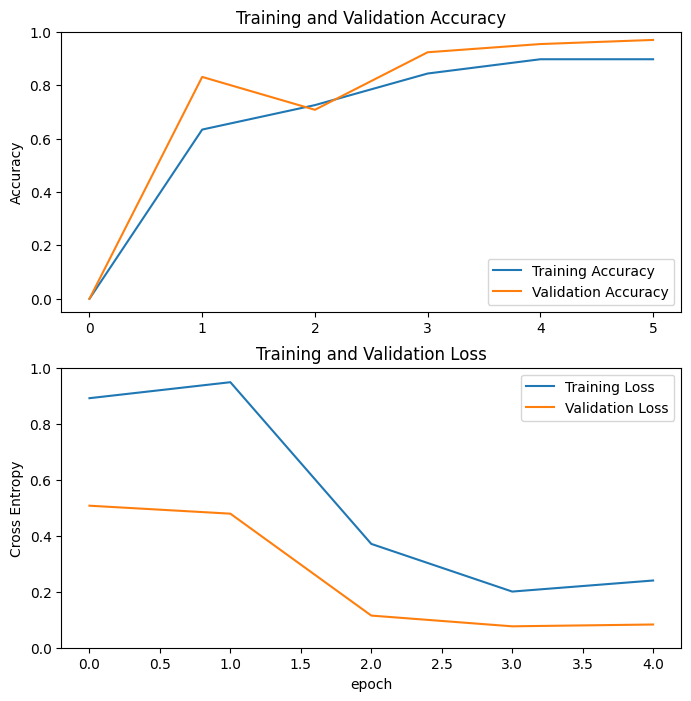

In [85]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [86]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_7[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

In [87]:
base_model.trainale=True

In [88]:
fine_tune_at=126
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable=False
loss_function=tf.keras.losses.BinaryCrossentropy(from_logits=True)
optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate*0.1)
metrics=['accuracy']

model2.compile(loss=loss_function,optimizer=optimizer,metrics=metrics)

In [89]:
fine_tune_epochs=5
total_epochs=initial_epochs+fine_tune_epochs
history_fine=model2.fit(train_dataset,epochs=total_epochs,initial_epoch=history.epoch[-1],validation_data=validation_dataset)

Epoch 5/10


9/9 [==============================] - 7s 403ms/step - loss: 0.1995 - accuracy: 0.9237 - val_loss: 0.0624 - val_accuracy: 0.9846
Epoch 6/10
9/9 [==============================] - 4s 373ms/step - loss: 0.2006 - accuracy: 0.9313 - val_loss: 0.0661 - val_accuracy: 0.9846
Epoch 7/10
9/9 [==============================] - 4s 394ms/step - loss: 0.2192 - accuracy: 0.9046 - val_loss: 0.0731 - val_accuracy: 0.9692
Epoch 8/10
9/9 [==============================] - 3s 347ms/step - loss: 0.1834 - accuracy: 0.9237 - val_loss: 0.0665 - val_accuracy: 0.9846
Epoch 9/10
9/9 [==============================] - 3s 297ms/step - loss: 0.1982 - accuracy: 0.9351 - val_loss: 0.0678 - val_accuracy: 0.9846
Epoch 10/10
9/9 [==============================] - 3s 301ms/step - loss: 0.1455 - accuracy: 0.9313 - val_loss: 0.0708 - val_accuracy: 0.9692


In [69]:
print(base_model.layers[0].trainable)

False


In [90]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

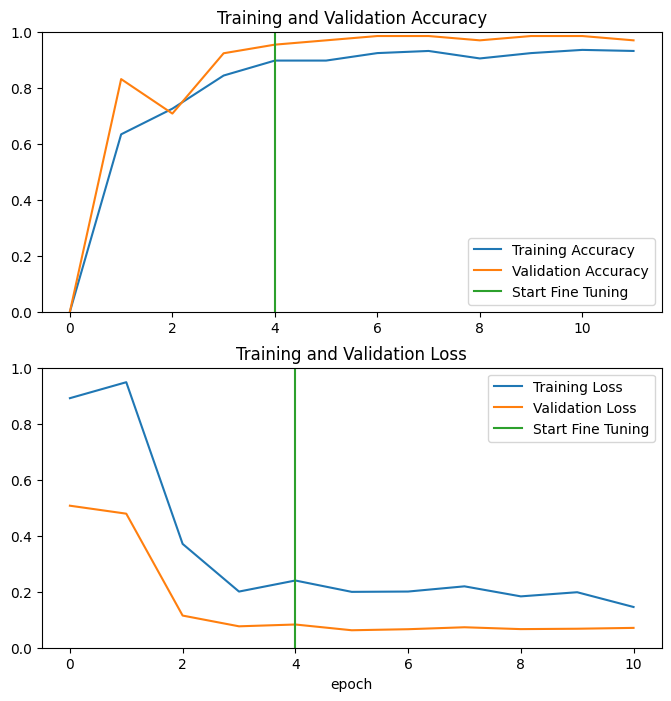

In [91]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()